In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("covid_19.csv")

In [9]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.shape

(49068, 10)

In [20]:
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [11]:
df.rename(columns={"Date": "date",
                  "Province/State": "state",
                  "Country/Region": "country",
                  "Lat":"lat",
                  "Long":"long",
                  "Confirmed":"confirmed",
                  "Deaths":"deaths",
                  "Recovered":"recovered",
                  "Active":"active",
                  "WHO Region":"WHO"},inplace= True)

In [12]:
df['active'].sum()          # active cases

396715350

In [13]:
top = df[df["date"]=="2020-07-27"]
top
# i am selecting the date where the date is 27th july 2020 and this will give me the total record of that date.

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active                    WHO  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [14]:
# we are creating a new data frame where we have all the country records along with total confirmed, deaths, 
# recovered, active cases record
world = top.groupby("country").sum()[["confirmed","deaths","recovered","active"]].reset_index()
world

country  confirmed  deaths  recovered  active
0           Afghanistan      36263    1269      25198    9796
1               Albania       4880     144       2745    1991
2               Algeria      27973    1163      18837    7973
3               Andorra        907      52        803      52
4                Angola        950      41        242     667
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621      78       3752    6791
183      Western Sahara         10       1          8       1
184               Yemen       1691     483        833     375
185              Zambia       4552     140       2815    1597
186            Zimbabwe       2704      36        542    2126

[187 rows x 5 columns]

In [15]:
# px.choropleth : This function from plotly express is used to create a choropleth map.
figure = px.choropleth(world,locations= "country",
                      locationmode= "country names", color= "active",
                      hover_name= "country",range_color=[1,10000],
                      color_continuous_scale= "blues",
                      title="Countries With Active Cases")
figure.show()

In [16]:
figure = px.choropleth(world,locations= "country",
                      locationmode= "country names", color= "recovered",
                      hover_name= "country",range_color=[1,10000],
                      color_continuous_scale= "greens",
                      title="Countries With Recovered Cases")
figure.show()

In [17]:
# Analyse the trend in the active,death, confirmed, and recovered case.

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

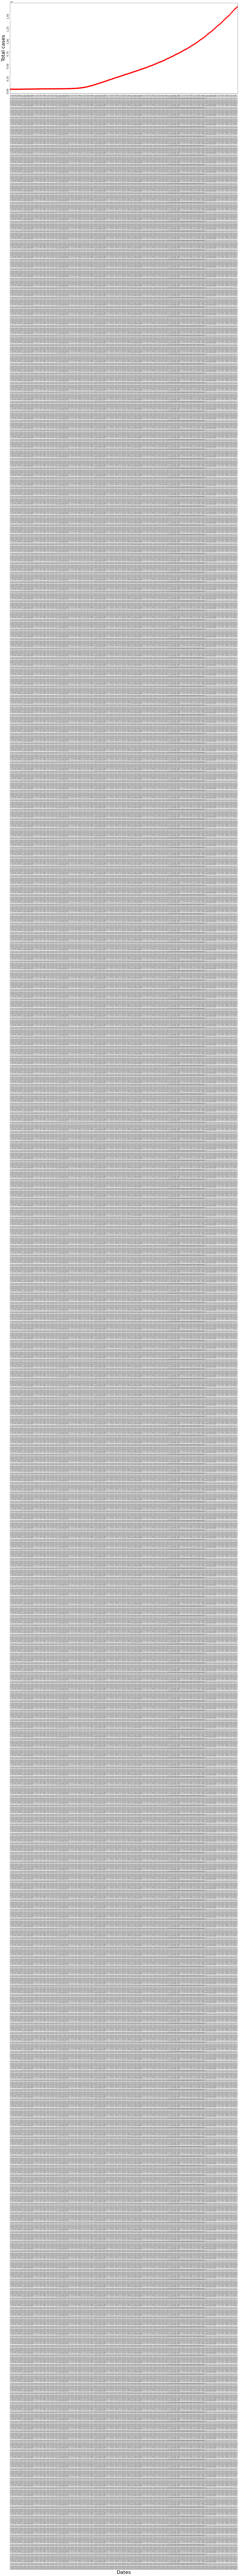

In [24]:
# # TREND OF HOW COVID SPREAD
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
# plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")[['date', 'confirmed']].sum().reset_index(drop=True)

total_cases

ax = sns.pointplot(x=total_cases.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [26]:
total_cases

date  confirmed
0    2020-01-222020-01-222020-01-222020-01-222020-0...        555
1    2020-01-232020-01-232020-01-232020-01-232020-0...        654
2    2020-01-242020-01-242020-01-242020-01-242020-0...        941
3    2020-01-252020-01-252020-01-252020-01-252020-0...       1434
4    2020-01-262020-01-262020-01-262020-01-262020-0...       2118
..                                                 ...        ...
183  2020-07-232020-07-232020-07-232020-07-232020-0...   15510481
184  2020-07-242020-07-242020-07-242020-07-242020-0...   15791645
185  2020-07-252020-07-252020-07-252020-07-252020-0...   16047190
186  2020-07-262020-07-262020-07-262020-07-262020-0...   16251796
187  2020-07-272020-07-272020-07-272020-07-272020-0...   16480485

[188 rows x 2 columns]

### Top 20 countries having most active death cases

In [28]:
top_deaths = df.groupby(by="country")["deaths"].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

country    deaths
0               US  11011411
1   United Kingdom   3997775
2           Brazil   3938034
3            Italy   3707717
4           France   3048524
5            Spain   3033030
6           Mexico   1728277
7            India   1111831
8             Iran   1024136
9          Belgium    963679
10         Germany    871322
11          Canada    699566
12           China    672413
13            Peru    652113
14     Netherlands    622314
15          Russia    619385
16          Turkey    466056
17          Sweden    448913
18         Ecuador    346618
19           Chile    322480

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

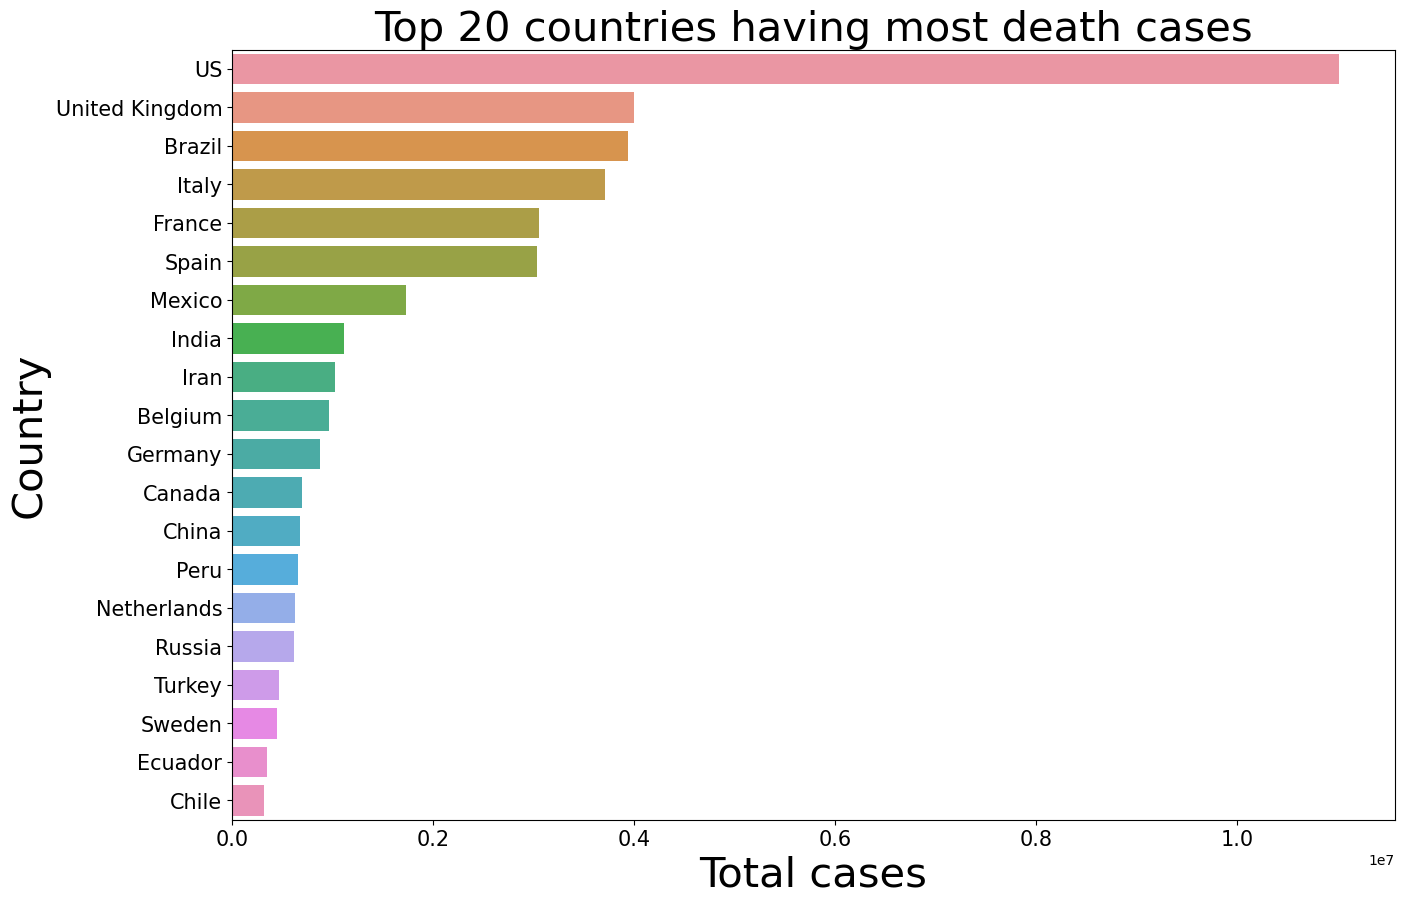

In [29]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [30]:
# Top 20 countries with highest active caes
top_active = df.groupby(by="country")["active"].sum().sort_values(ascending = False).head(20).reset_index()
top_active

country     active
0               US  156981121
1           Brazil   31094060
2   United Kingdom   22624595
3           Russia   19668578
4            India   15987913
5           France   10980287
6            Spain    9277432
7           Canada    8656985
8             Peru    7748957
9            Italy    7363518
10        Pakistan    5633262
11    South Africa    5150341
12      Bangladesh    4924394
13     Netherlands    4528235
14          Sweden    4524247
15          Turkey    4091900
16        Colombia    3832786
17    Saudi Arabia    3783704
18         Belgium    3689945
19           Chile    3320581

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

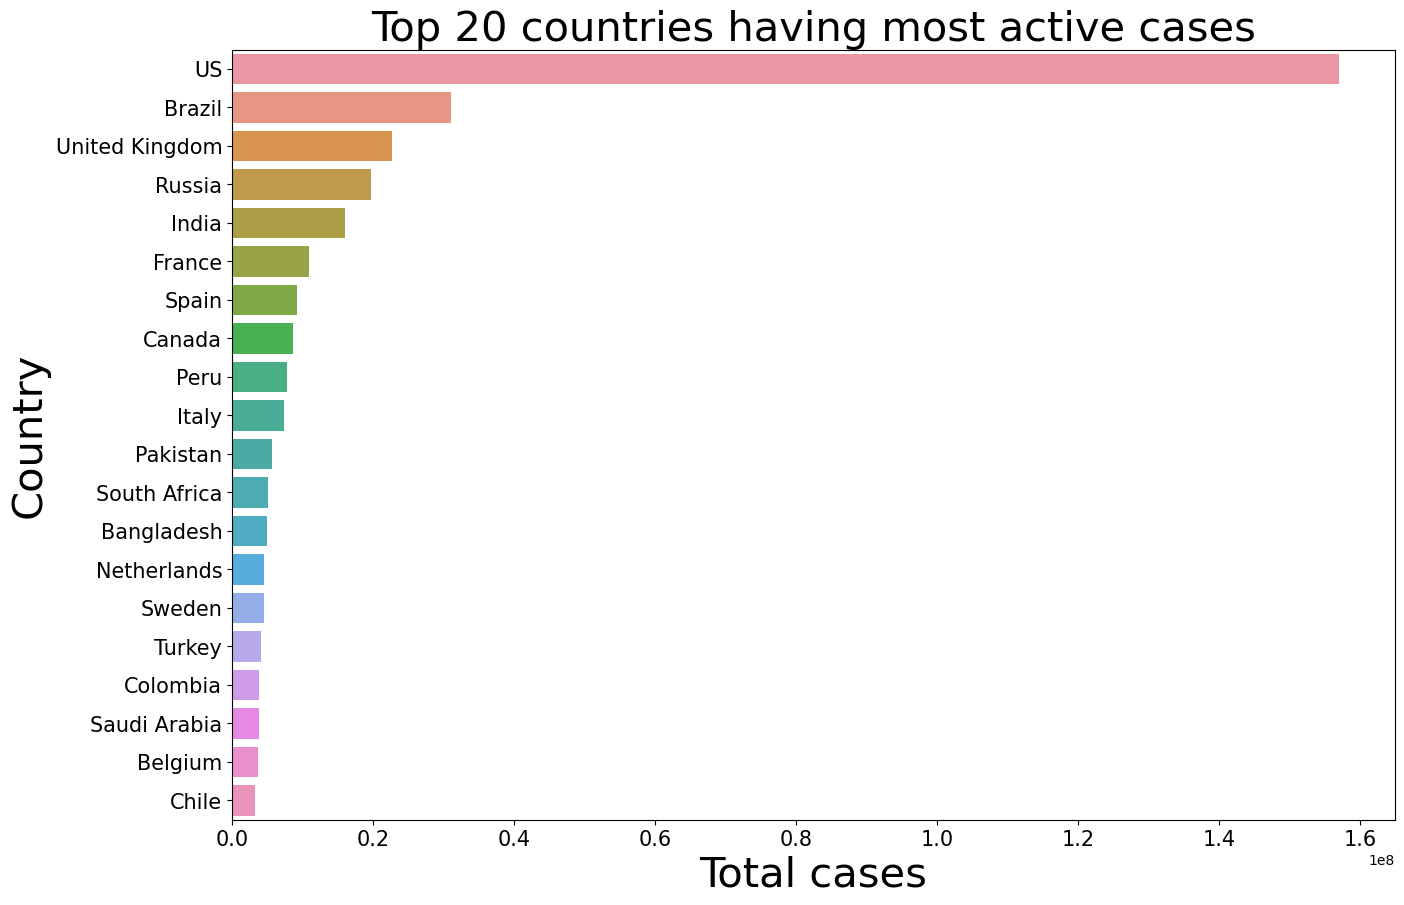

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_active.active, y=top_active.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [33]:
# Top 20 countries with highest confirmed caes
top_cnf = df.groupby(by="country")["confirmed"].sum().sort_values(ascending = False).head(20).reset_index()
top_cnf

country  confirmed
0               US  224345948
1           Brazil   89524967
2           Russia   45408411
3            India   40883464
4            Spain   27404045
5   United Kingdom   26748587
6            Italy   26745145
7           France   21210926
8          Germany   21059152
9             Iran   19339267
10            Peru   19263916
11          Turkey   17903345
12           Chile   16935654
13          Mexico   14946202
14           China   14132002
15        Pakistan   12833994
16    Saudi Arabia   12362961
17    South Africa   11168743
18          Canada    9356551
19      Bangladesh    8754729

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

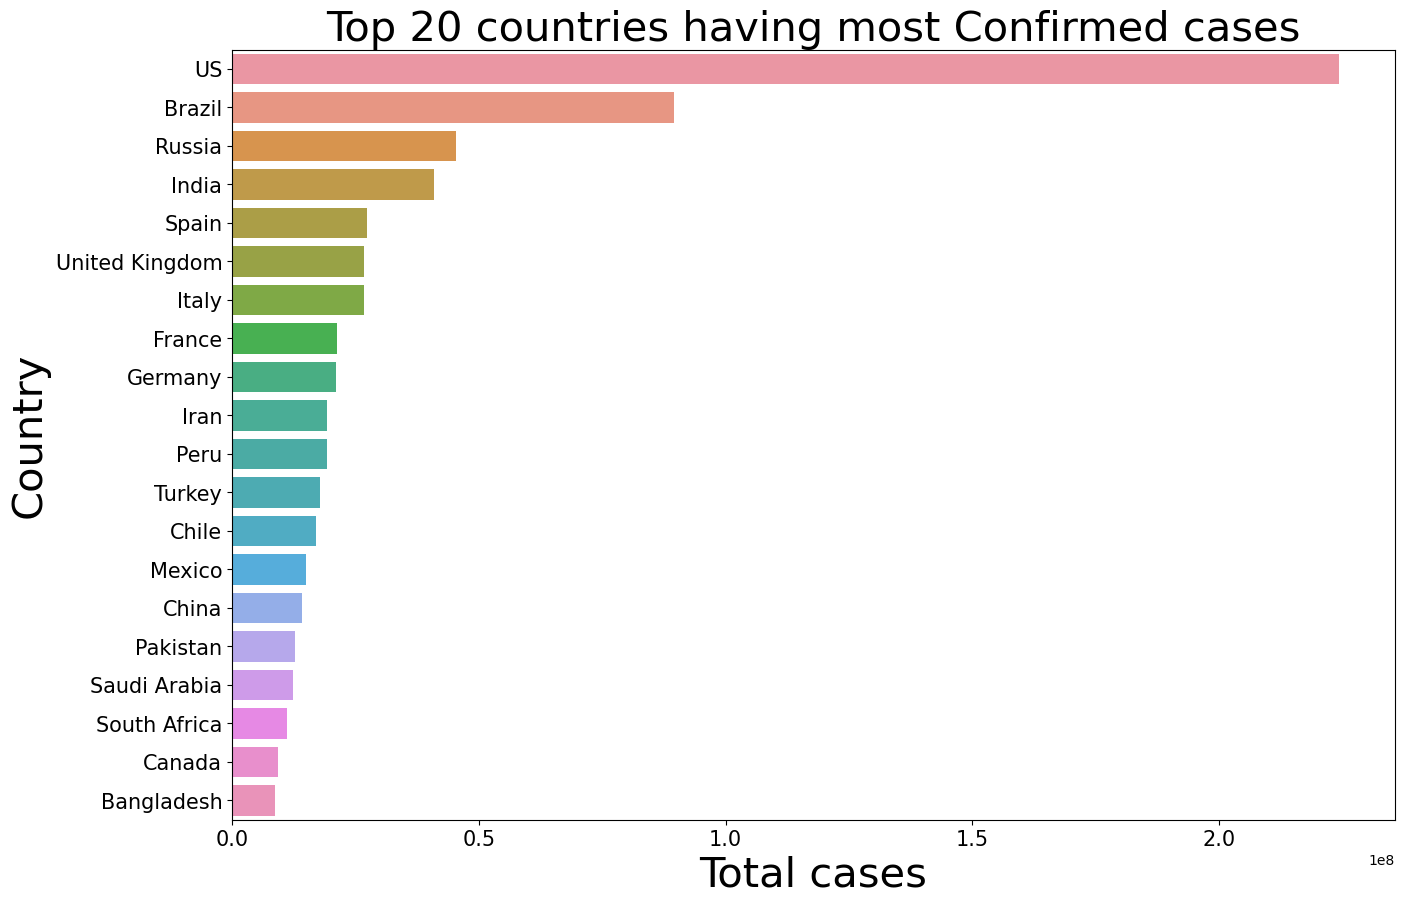

In [35]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_cnf.confirmed, y=top_cnf.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [ ]:
# Top 5 countries having highest active cases are;
#     US
#     Brazil
#     UK
#     Russia
#     India

In [37]:
Brazil = df[df.country=="Brazil"]
Brazil = Brazil.groupby(by="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()

In [38]:
Brazil

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    1620313   84082    2287475  583080
184  2020-07-24    1693214   85238    2343366  564914
185  2020-07-25    1785359   86449    2394513  522705
186  2020-07-26    1812913   87004    2419091  519174
187  2020-07-27    1846641   87618    2442375  508116

[188 rows x 5 columns]

In [39]:
US = df[df.country=="US"]
US = US.groupby(by="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()

In [40]:
US

date  recovered  deaths  confirmed   active
0    2020-01-22          0       0          1        1
1    2020-01-23          0       0          1        1
2    2020-01-24          0       0          2        2
3    2020-01-25          0       0          2        2
4    2020-01-26          0       0          5        5
..          ...        ...     ...        ...      ...
183  2020-07-23    1233269  144430    4038816  2661117
184  2020-07-24    1261624  145560    4112531  2705347
185  2020-07-25    1279414  146465    4178970  2753091
186  2020-07-26    1297863  146935    4233923  2789125
187  2020-07-27    1325804  148011    4290259  2816444

[188 rows x 5 columns]

In [41]:
Russia = df[df.country=="Russia"]
Russia = Russia.groupby(by="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()

In [42]:
Russia

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     579295   12873     793720  201552
184  2020-07-24     587728   13026     799499  198745
185  2020-07-25     596064   13172     805332  196096
186  2020-07-26     599172   13249     811073  198652
187  2020-07-27     602249   13334     816680  201097

[188 rows x 5 columns]

In [43]:
India = df[df.country=="India"]
India = India.groupby(by="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()

In [44]:
India

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     817209   30601    1288108  440298
184  2020-07-24     849432   31358    1337024  456234
185  2020-07-25     885573   32060    1385635  468002
186  2020-07-26     917568   32771    1435616  485277
187  2020-07-27     951166   33408    1480073  495499

[188 rows x 5 columns]

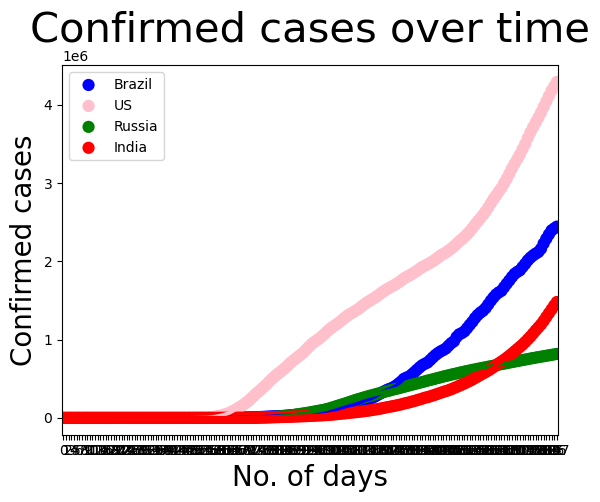

In [45]:
sns.pointplot(data=Brazil, x=Brazil.index, y='confirmed', color="Blue", label="Brazil")
sns.pointplot(data=US, x=US.index, y='confirmed', color="Pink", label="US")
sns.pointplot(data=Russia, x=Russia.index, y='confirmed', color="Green", label="Russia")
sns.pointplot(data=India, x=India.index, y='confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


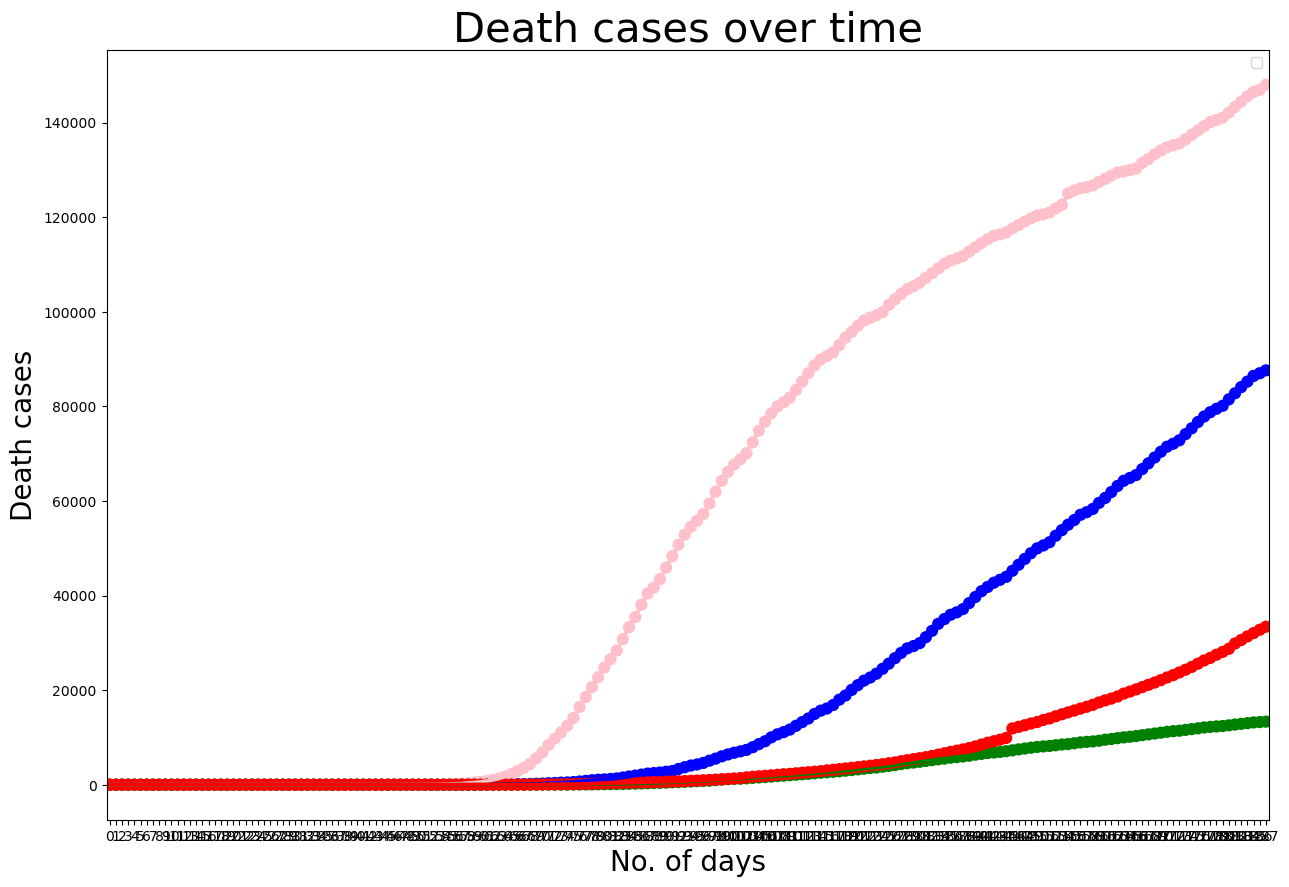

In [46]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.deaths, color="Blue")
sns.pointplot(x=US.index, y=US.deaths, color="Pink")
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Green")
sns.pointplot(x=India.index, y=India.deaths, color="Red")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

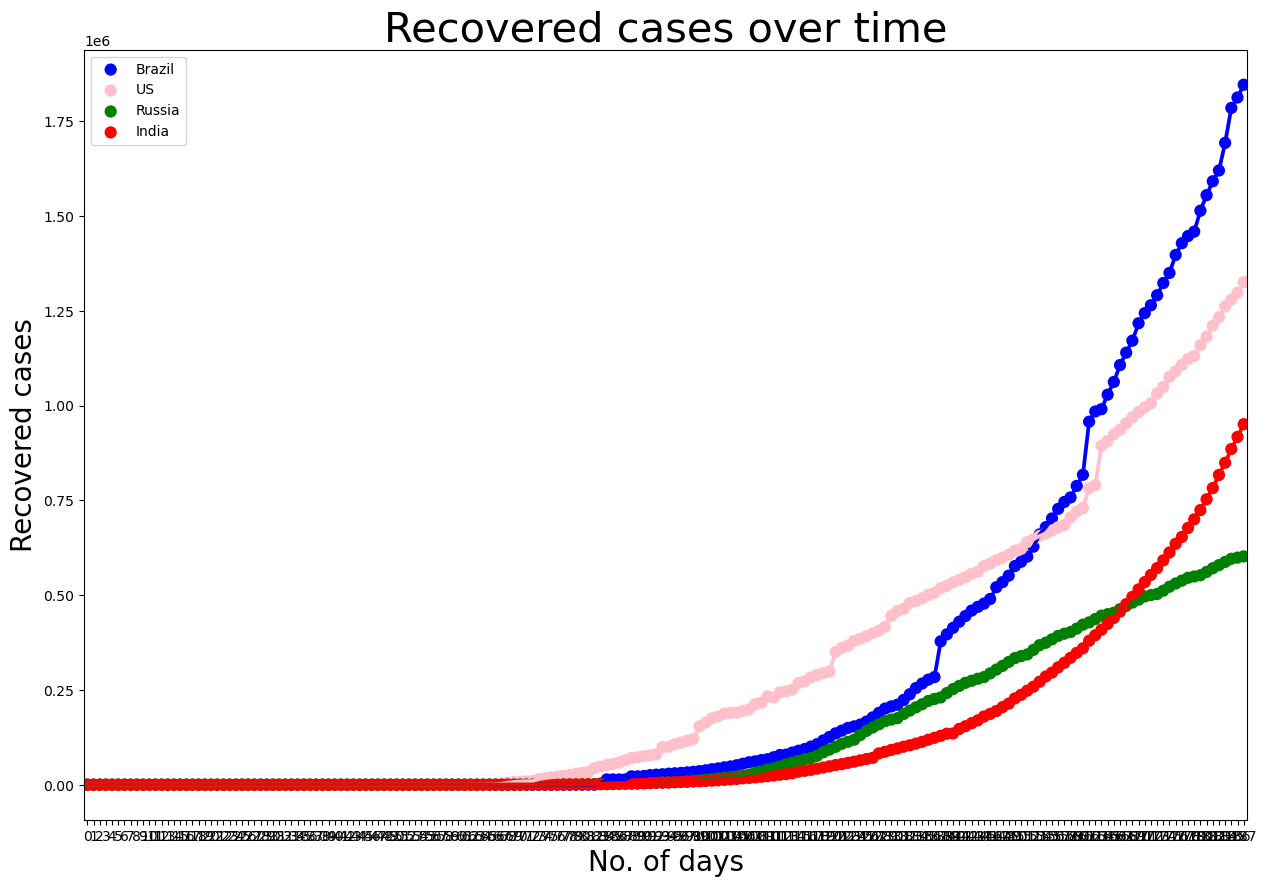

In [47]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color="Blue", label="Brazil")
sns.pointplot(x=US.index, y=US.recovered, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.recovered, color="Green", label="Russia")
sns.pointplot(x=India.index, y=India.recovered, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

### FORECASTING USING FBPROPHET

In [ ]:
# FB Prophet

# # Prophet is a forecasting tool open-sourced by Facebook that is designed for creating accurate time-series forecasts.
# It's widely used for its simplicity and ability to handle various time-series data types with customizable features.
# Whether it's daily observations, irregular intervals, or seasonality, Prophet can often adapt well.

In [48]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/6b/3c/79d6da1af2a9bd6a534c5a283271eff1bdd673241cda795919a2b41578b3/prophet-1.1.5-py3-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5b/a0/a0f4a556dff2189bc08d0f69f0d4aac1b7e4e0cedc9a70b30a134f73d100/cmdstanpy-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/62/65/0c1b00ba459c6b4cfacdfb060e21160320b60f0fb3ebc97bca982f1db861/holidays-0.45-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f

In [49]:
from prophet import Prophet

In [51]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active                    WHO  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [52]:
df["date"]=pd.to_datetime(df["date"])

In [53]:
df

state                country        lat       long       date  \
0       NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1       NaN                Albania  41.153300  20.168300 2020-01-22   
2       NaN                Algeria  28.033900   1.659600 2020-01-22   
3       NaN                Andorra  42.506300   1.521800 2020-01-22   
4       NaN                 Angola -11.202700  17.873900 2020-01-22   
...     ...                    ...        ...        ...        ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065   NaN                Comoros -11.645500  43.333300 2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600 2020-07-27   

       confirmed  deaths  recovered  active                    WHO  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      14664 non-null  object        
 1   country    49068 non-null  object        
 2   lat        49068 non-null  float64       
 3   long       49068 non-null  float64       
 4   date       49068 non-null  datetime64[ns]
 5   confirmed  49068 non-null  int64         
 6   deaths     49068 non-null  int64         
 7   recovered  49068 non-null  int64         
 8   active     49068 non-null  int64         
 9   WHO        49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [55]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
confirmed

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

In [56]:
deaths=df.groupby("date").sum()["deaths"].reset_index()
deaths

date  deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [57]:
recovered=df.groupby("date").sum()["recovered"].reset_index()
recovered

date  recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [58]:
active=df.groupby("date").sum()["active"].reset_index()
active

date   active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

### Forecasting for the confirmed cases

In [59]:
# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'

In [60]:
confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

In [61]:
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [62]:
con_model = Prophet(interval_width=0.95)

In [63]:
con_model

In [64]:
# Training of Model (fiting thr data to the model)
con_model.fit(confirmed)

13:50:47 - cmdstanpy - INFO - Chain [1] start processing
13:50:48 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
future=con_model.make_future_dataframe(periods=7)

In [66]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [67]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.631988e+07  1.614738e+07  1.648237e+07
189 2020-07-29  1.652971e+07  1.637471e+07  1.668840e+07
190 2020-07-30  1.674364e+07  1.657195e+07  1.690114e+07
191 2020-07-31  1.695885e+07  1.679406e+07  1.712058e+07
192 2020-08-01  1.716650e+07  1.699631e+07  1.733412e+07
193 2020-08-02  1.736400e+07  1.718417e+07  1.752244e+07
194 2020-08-03  1.755861e+07  1.738019e+07  1.773593e+07

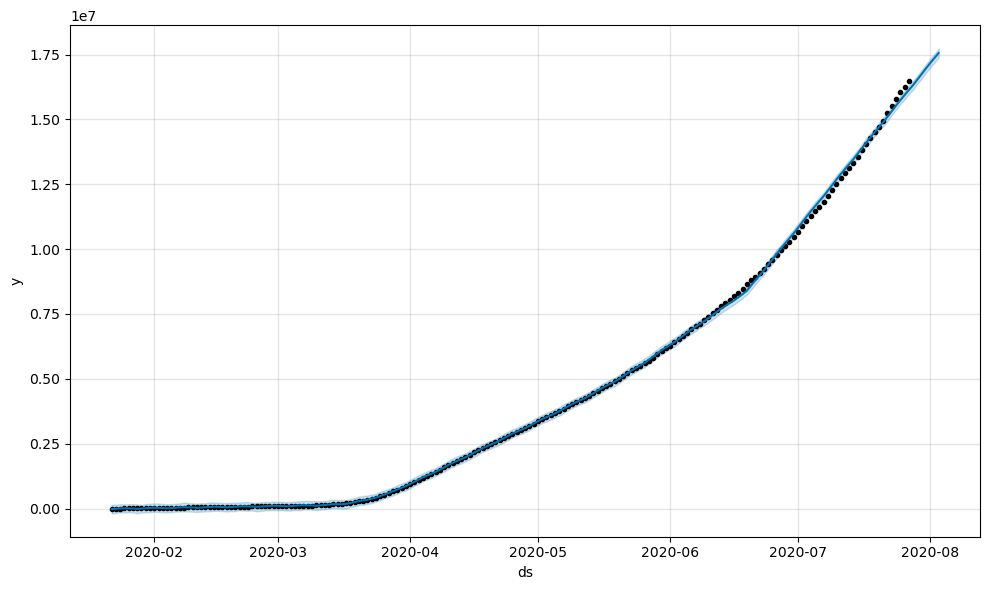

In [68]:
confirmed_plot=con_model.plot(forecast)

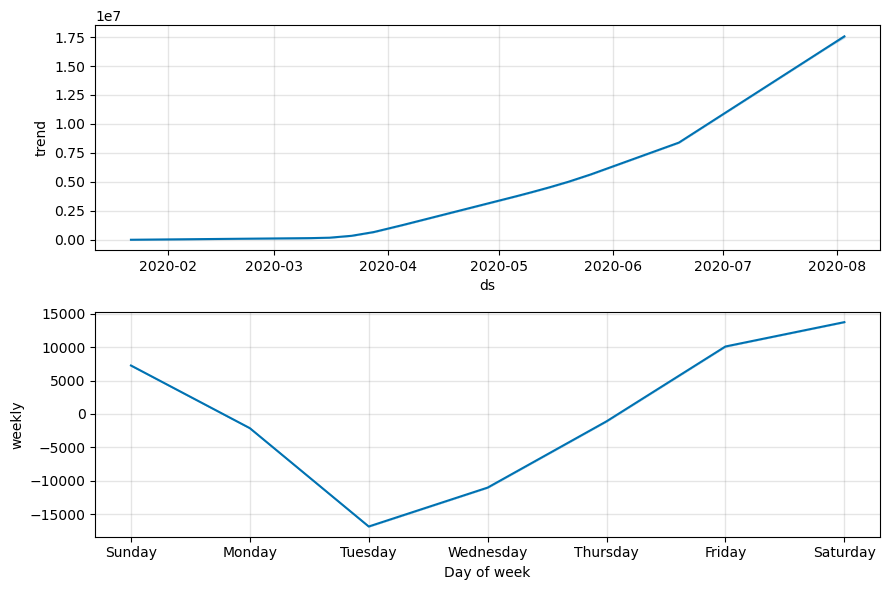

In [69]:
confirmed_forecast_plot1 = con_model.plot_components(forecast)

In [70]:
deaths

date  deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [71]:
deaths.rename(columns={"date":"ds","deaths":"y"},inplace=True)

In [72]:
deaths

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [73]:
death_model=Prophet(interval_width=0.95)

In [74]:
# Training of Model (fiting thr data to the model)
death_model.fit(deaths)

13:54:35 - cmdstanpy - INFO - Chain [1] start processing
13:54:35 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
future=death_model.make_future_dataframe(periods=7)

In [76]:
forecast=death_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  652334.441648  649346.417615  655377.630438
189 2020-07-29  657901.725117  654769.733238  660923.818967
190 2020-07-30  663511.846561  660051.399748  666487.525635
191 2020-07-31  669027.886704  665612.071450  672304.049131
192 2020-08-01  673910.796693  669899.416656  677852.139633
193 2020-08-02  678049.434351  673623.788597  682084.838329
194 2020-08-03  682340.734401  676469.581645  686989.774744

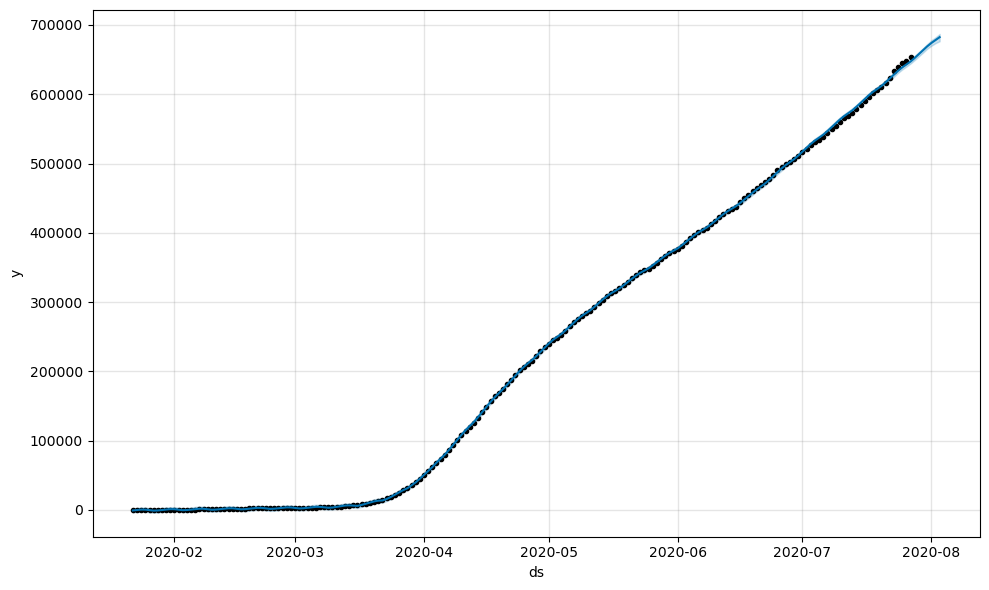

In [77]:
death_plot=death_model.plot(forecast)

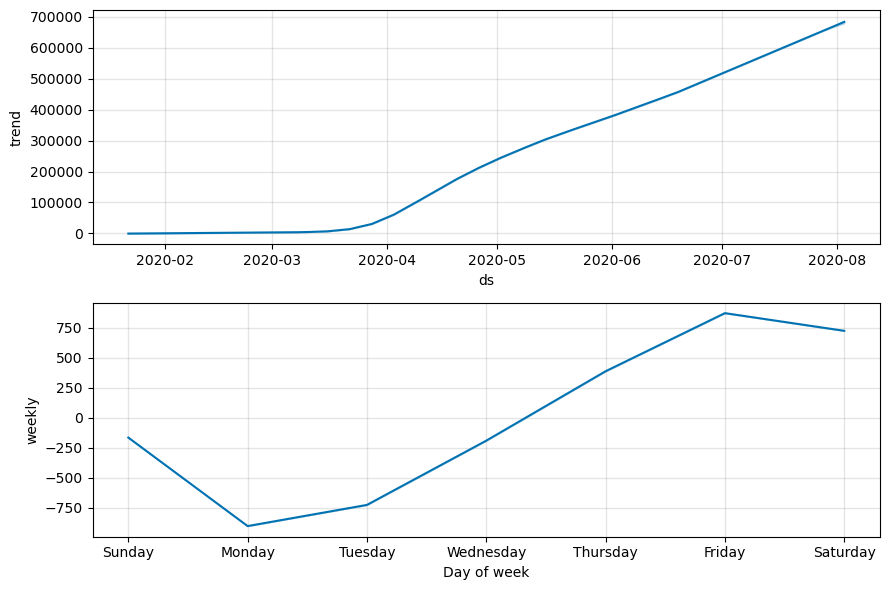

In [78]:
death_forecast_plot1 = death_model.plot_components(forecast)